In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# installer librairie prophet
#!pip install fbprophet

In [ ]:
# installer plotly
#!pip install plotly

In [4]:
# Load dataset train
train = pd.read_csv('/Users/lucilerabeau/ventilator-pressure-prediction/data/train.csv')

In [3]:
from fbprophet import Prophet
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [12]:
df = pd.DataFrame(train.drop(['id', 'breath_id', 'R', 'C', 'u_in', 'u_out'], axis=1)).rename(columns={'time_step': 'ds', 'pressure': 'y'})
df.head()

,ds,y
0,0.000000,5.837492
1,0.033652,5.907794
2,0.067514,7.876254
3,0.101542,11.742872
4,0.135756,12.234987


In [13]:
model = Prophet(interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -67642.3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      12    1.1084e+07   0.000354013       1552.66           1           1       30   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [14]:
future = model.make_future_dataframe(periods=36, freq='MS')
future.head()

,ds
0,1970-01-01
1,1970-01-01
2,1970-01-01
3,1970-01-01
4,1970-01-01


In [15]:
forecast = model.predict(future)
forecast.head()

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [ ]:
plt.figure(figsize=(18, 8))
model.plot(forecast, xlabel = 'date', ylabel = 'Wind')
plt.title('Index')
plt.show()

In [ ]:
model.plot_components(forecast)

In [16]:
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [18]:
train['R'].unique()

array([20, 50,  5])

In [19]:
train['C'].unique()

array([50, 20, 10])

In [26]:
train.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object')

In [27]:
df = train.drop(['id', 'breath_id','time_step', 'u_in', 'u_out', 'pressure'], axis=1)

In [28]:
import seaborn as sns

<AxesSubplot:>

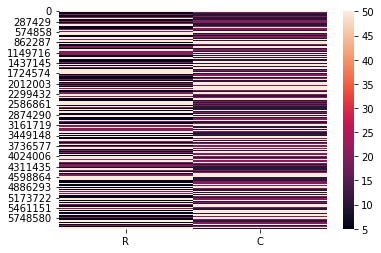

In [29]:
sns.heatmap(df)

In [23]:
train['C'].shape, train['R'].shape

((6036000,), (6036000,))

In [5]:
r_values = train['R'].unique()
r_values

array([20, 50,  5])

In [6]:
c_values = train['C'].unique()

In [7]:
rc_values = np.array([[[r, c, len(train[(train['R'] == r) & (train['C'] == c)])] for r in r_values for c in c_values]])

In [75]:
rc_value_C10 = np.array([[len(train[(train['R'] == 5) & (train['C'] == 10)]), len(train[(train['R'] == 20) & (train['C'] == 10)]), len(train[(train['R'] == 50) & (train['C'] == 10)])]])

In [76]:
rc_value_C10

array([[ 664960,  485600, 1094160]])

In [77]:
rc_value_C20 = np.array([[len(train[(train['R'] == 5) & (train['C'] == 20)]), len(train[(train['R'] == 20) & (train['C'] == 20)]), len(train[(train['R'] == 50) & (train['C'] == 20)])]])

In [78]:
rc_value_C50 = np.array([[len(train[(train['R'] == 5) & (train['C'] == 50)]), len(train[(train['R'] == 20) & (train['C'] == 50)]), len(train[(train['R'] == 50) & (train['C'] == 50)])]])

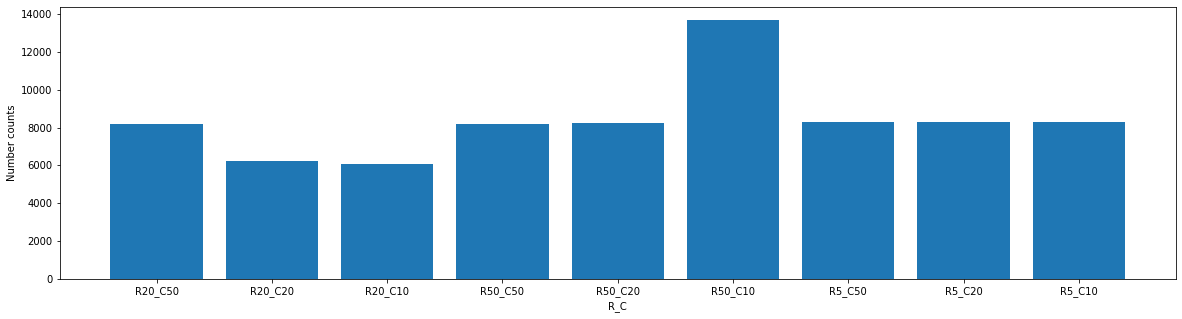

In [33]:
# R_C combinaisons count (nb de respi)
x = range(len(rc_values))
plt.figure(figsize = (20,5))
plt.bar(x, rc_values[:,2]/80)
plt.xticks(x, ['R' + str(r) + '_' + 'C' + str(c) for r, c in rc_values[:,:2]])
plt.xlabel('R_C')
plt.ylabel('Number counts')
plt.show()

In [36]:
x = range(len(rc_values))
x

range(0, 9)

In [23]:
rc_values[0][0][2]

654880

In [28]:
test = pd.DataFrame(rc_values[0], axis=1)

TypeError: __init__() got an unexpected keyword argument 'axis'

In [29]:
test.head()

,0,1,2
0,20,50,654880
1,20,20,496640
2,20,10,485600
3,50,50,655120
4,50,20,660800


In [14]:
new_cols = ['R', 'C', 'count']
new_names_map = {test.columns[i]:new_cols[i] for i in range(len(new_cols))}

test.rename(new_names_map, axis=1, inplace=True)

In [15]:
test.head()

,R,C,count
0,20,50,654880
1,20,20,496640
2,20,10,485600
3,50,50,655120
4,50,20,660800


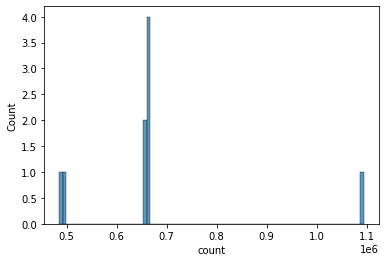

In [19]:
plt.figure()
sns.histplot(test['count'])
plt.show()

<AxesSubplot:>

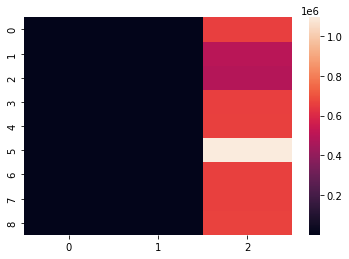

In [46]:
sns.heatmap(test)

In [79]:
rc_value = np.concatenate((rc_value_C10, rc_value_C20, rc_value_C50), axis=0)

In [72]:
rc_value_C10

array([ 664960,  485600, 1094160])

In [73]:
rc_value_C20

array([662160, 496640, 660800])

In [74]:
rc_value_C50

array([661680, 654880, 655120])

In [80]:
rc_value

array([[ 664960,  485600, 1094160],
       [ 662160,  496640,  660800],
       [ 661680,  654880,  655120]])

<AxesSubplot:>

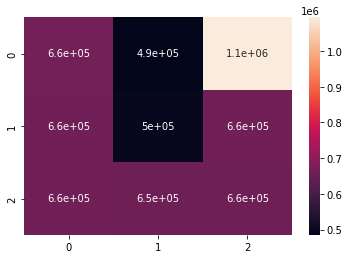

In [83]:
sns.heatmap(rc_value, annot=True)

In [55]:
rc_values = np.array([[[('R' + str(r) + '_' + 'C' + str(c)), len(train[(train['R'] == r) & (train['C'] == c)])] for r in r_values for c in c_values]])

In [56]:
rc_values

array([[['R20_C50', '654880'],
        ['R20_C20', '496640'],
        ['R20_C10', '485600'],
        ['R50_C50', '655120'],
        ['R50_C20', '660800'],
        ['R50_C10', '1094160'],
        ['R5_C50', '661680'],
        ['R5_C20', '662160'],
        ['R5_C10', '664960']]], dtype='<U21')

In [57]:
lung_type = {'R20_C50': [654880],
            'R20_C20': [496640],
            'R20_C10': [485600], 
            'R50_C50': [655120],
            'R50_C20': [660800],
            'R50_C10': [1094160],
            'R5_C50': [661680],
            'R5_C20': [662160],
            'R5_C10': [664960]} 

In [58]:
test2 = pd.DataFrame(rc_values[0], columns=['type', 'count'])

In [59]:
test2

,type,count
0,R20_C50,654880
1,R20_C20,496640
2,R20_C10,485600
3,R50_C50,655120
4,R50_C20,660800
5,R50_C10,1094160
6,R5_C50,661680
7,R5_C20,662160
8,R5_C10,664960


In [60]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    9 non-null      object
 1   count   9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [61]:
test2['count'] = test2['count'].apply(lambda x: int(x))

In [62]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    9 non-null      object
 1   count   9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


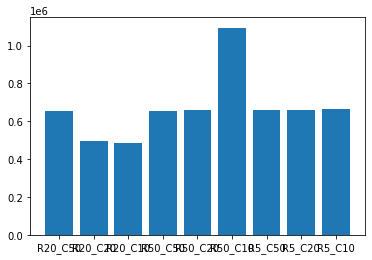

In [65]:
plt.figure()
plt.bar(test2['type'], test2['count'])
plt.show()